In [1]:
from IPython.display import display
from sklearn.svm import SVR
import matplotlib.pyplot as plt

<p style="font-size: 25px; line-height: 135%;}">
<b>Bike Sharing: Predicción de Demanda Horaria</b>
</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta a</b>
</p>


Summary - dataframe completo:



,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2146
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB

Daset después de la creación de features


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
1,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
2,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
3,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6
4,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7



 Histogramas


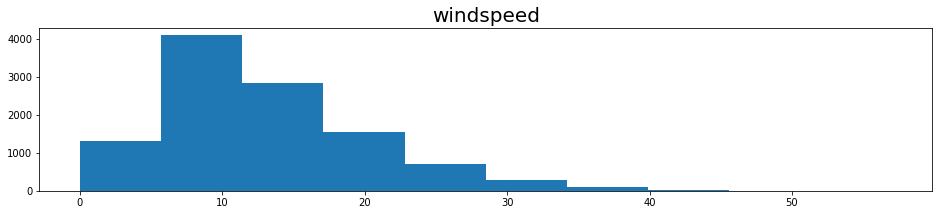

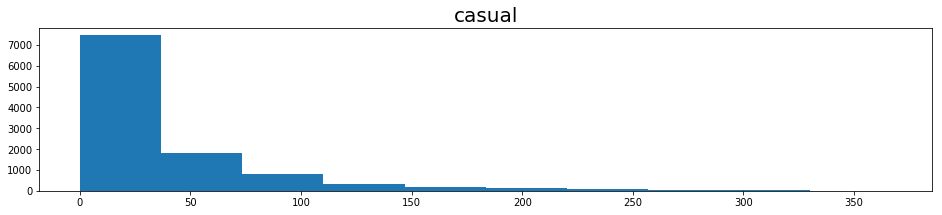

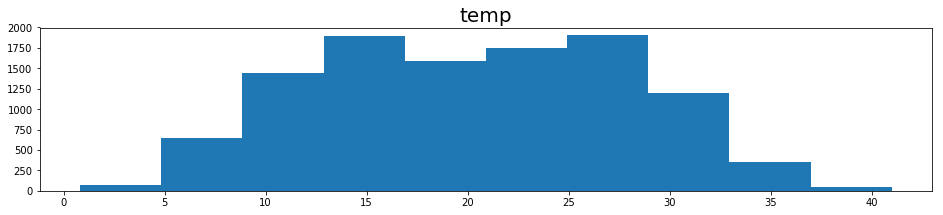

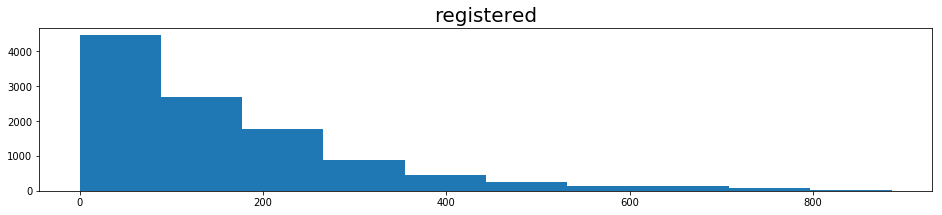

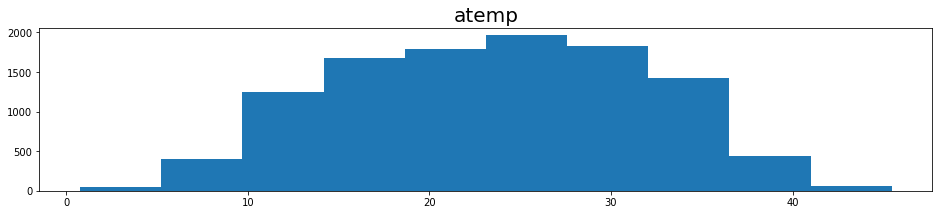

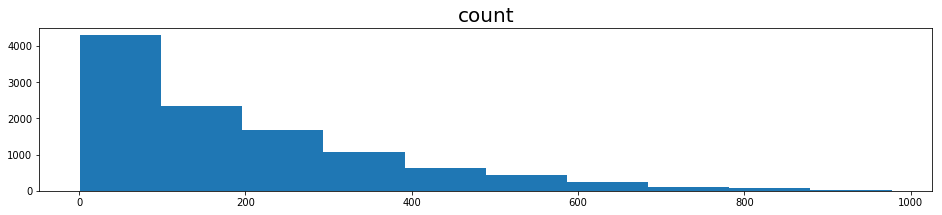

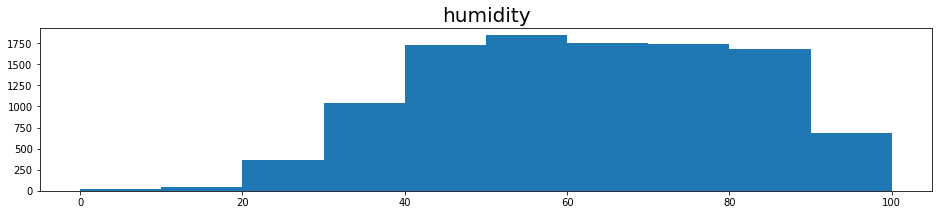

In [2]:
import pandas as pd
import numpy as np

#Se importa para hacer el tratamiento de la fecha
from datetime import datetime

dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])

#Se elimina este atributo ya que no se sabe que es y no aporta información
del df["Unnamed: 0"]

print('\nSummary - dataframe completo:\n')

display(df.describe())
df.info()

#======================================================================================
#Se crean features de la parte d
#======================================================================================
df['datetime']=df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['year']=df['datetime'].apply(lambda x:x.year)
df['month']=df['datetime'].apply(lambda x:x.month)
df['day']=df['datetime'].apply(lambda x:x.day)
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

print("\nDaset después de la creación de features")

display(df.head())

#========================================================================================
#Se procede a hacer los histogramas
#========================================================================================
#Se definen los features a graficar
features = set(list(df))
features = list(features - set(["datetime", "season", "holiday", "workingday", "weather", "year", "month", "day", "hour"]))
print("\n Histogramas")
for i in features:
    plt.figure(figsize = (16, 3))
    plt.hist(df[i])
    plt.title(i, fontsize=20)
    plt.show()

   

<p style="font-size: 18px; line-height: 135%;}">
<b>a)</b>
El dataset presente tiene 10886 entradas, cada una no nula. Dentro de los atributos están los categóricos como 
<br><br>
Season: Toma valores entre 1, 2, 3 y 4 para indicar primavera, verano, otoño y invierno <br>
Holiday: 0 o 1 si es que es un día festivo <br>
Working day: 0 o 1 Si es un día de trabajo normal <br>
Weather: Toma valores entre 1, 2, 3 y 4 para indicar el clima del día <br>

El resto son variables que pertenecen a los reales o enteros, se puede ver más detalles al ver la salida de ``df.info()``<br><br>

De estas variables se decide realizar los histogramas mostrados en la sálida. Se aprecia que la variable del número de arriendos casual, registered y count están muy apegadas a la izquierda en el histograma, esto nos da una pista de una posible tranformación a realizar sobre count dado que es la variable a predecir, sería conveniente hacer una transformación para que los valores se distribuyan de mejor manera a lo largo del eje X.
</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta b</b>
</p>

D:\Users\Francisco\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


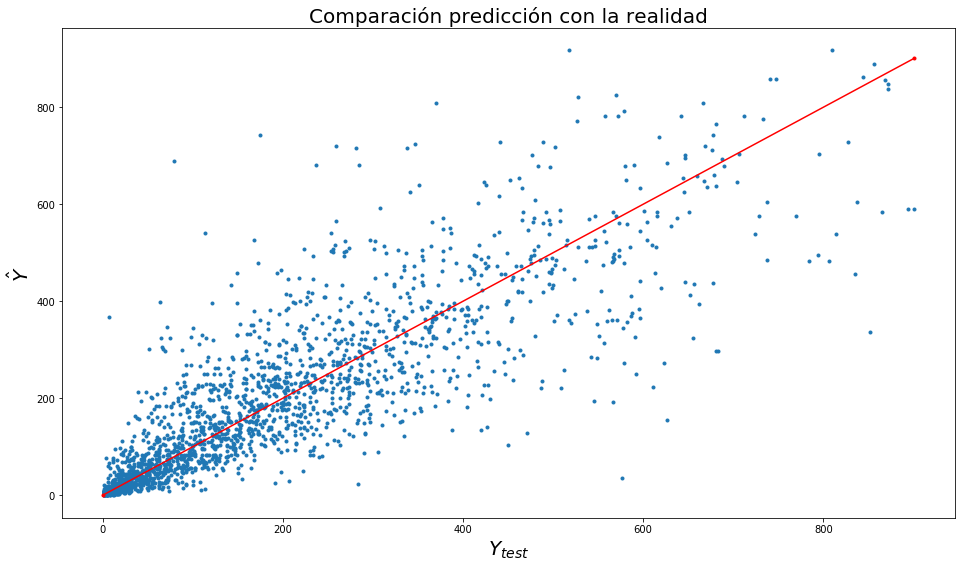

In [3]:
from sklearn.tree import DecisionTreeRegressor as Tree

def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

#Se define la matriz X e Y para el entrenamiento, validación y test
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

#Se entrena el árbol con el entrenamiento
model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print ("SCORE TEST=%f"%score_test)

#Se calculan predicciones 
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

#Se procede a evaluar la métrica del error
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

#Se procede a mostrar el error y gráficar los puntos
print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL TEST =%f"%kagg_test)
plt.figure(figsize = (16, 9))
plt.plot(Y_test,Y_pred_test,'.')
plt.plot([0, max(Y_test)], [0, max(Y_test)], ".-r")
plt.title('Comparación predicción con la realidad', fontsize=20)
plt.xlabel("$Y_{test}$", fontsize=20)
plt.ylabel("$\^{Y}$", fontsize=20)
plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>b)</b>
Al hacer el gráfico de $Y_{test}$ vs $\hat{Y}$ se aprecia que en la medida que las predicciones son más cercanas a la realidad se situan en torno a la diagonal de la forma $Y = 1\cdot X$. Dado que el error del conjunto de pruebas da alrededor de 0.57 se aprecia que solo algunos puntos efectivamente están en la diagonal y el resto se aleja de esta.
</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta c</b>
</p>

In [4]:
def buscarMejorProfundidad(X_train, X_val, Y_train, Y_val):
    menor = float("inf")

    #Se empieza a buscar la profundidad que produzca el menor error posible
    for profundidad in range(1, 30):
        model = Tree(random_state=0,max_depth=profundidad)
        model.fit(X_train,Y_train)
        Y_pred_val = model.predict(X_val)
        kagg_val = eval_bikemodel(Y_pred_val,Y_val)

        if kagg_val < menor:
            menor = kagg_val
            mejorProfundidad = profundidad
            
    return mejorProfundidad
    
mejorProfundidad = buscarMejorProfundidad(X_train, X_val, Y_train, Y_val)
print ("La mejor profundiad fue", mejorProfundidad)
model = Tree(random_state = 0, max_depth = mejorProfundidad)
model.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)
error_maxProfundidad = eval_bikemodel(Y_pred_test,Y_test)
print ("KAGG EVAL TEST =%f"%error_maxProfundidad)
print ("La diferencia de los errores es de", kagg_test - error_maxProfundidad)

La mejor profundiad fue 10
KAGG EVAL TEST =0.516396
La diferencia de los errores es de 0.0578424532371


<p style="font-size: 18px; line-height: 135%;}">
<b>c)</b>
Al correr el código se obtiene que la profundidad óptima es la señalada en la salida. Ajustar la profundidad maxima protege al árbol del sobre ajuste dado que no permite que se generen regiones con reglas tán especificas y así se logra mantener el poder de generalización de la máquina. Al ver el resultado efectivamente se redujo el error de la máquina aproximadamente en 5%.
</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta d</b>
</p>

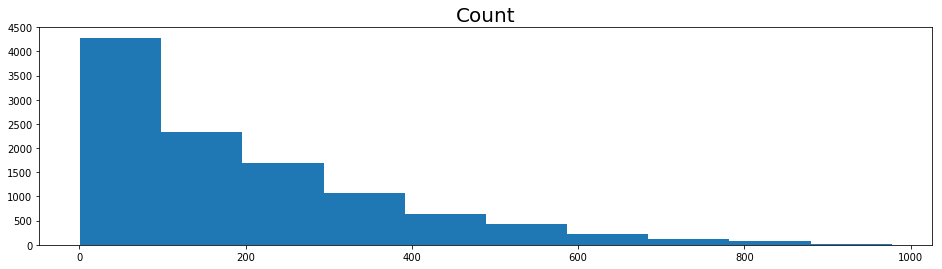

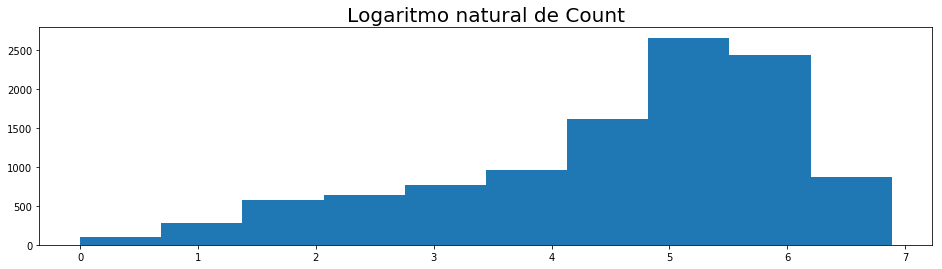

In [5]:
#Histograma de count 
plt.figure(figsize = (16, 4))
plt.hist(Ydf)
plt.title("Count", fontsize=20)
plt.show()

#Histograma de log(count) 
plt.figure(figsize = (16, 4))
plt.hist(np.log(Ydf))
plt.title("Logaritmo natural de Count", fontsize=20)
plt.show()

In [6]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['cday'] = pd.to_numeric(df['cday'])

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day','cday', 'month', 'year']]
Ydf=df.ix[:,'count']

#Se empieza el procedimiento para seleccionar atributos
atributos = set(['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day', 'cday', 'month', 'year'])
deboSeguir = True
anterior = 1
while (len(atributos) > 3) and deboSeguir:
    menor = float("inf")
    
    #Se empieza a sacar un atributo a la vez y se evaluara el conjunto de atributos candidato
    for i in atributos:
        candidato = atributos - set([i])
        
        #Se procede a calcular el conjunto de entrenamiento y validación
        X_train = Xdf[0:ntrain].values
        X_val = Xdf[ntrain:nval].values
        Y_train = Ydf[0:ntrain].values     
        Y_val = Ydf[ntrain:nval].values

        #Se busca la mejor profundidad posible para el dataset con los atributos actuales
        best = buscarMejorProfundidad(X_train, X_val, Y_train, Y_val)
        
        #Se procede a generar el árbol con la mejor profundidad y a entrenarlo
        model = Tree(random_state=0, max_depth = best)
        model.fit(X_train,Y_train)
        
        #Se predice la validación
        Y_pred_val = model.predict(X_val)

        #Evaluo la métrica del error
        kagg_val = eval_bikemodel(Y_pred_val,Y_val)
        
        if kagg_val < menor:
            menor = kagg_val
            atributo_a_eliminar = i
            mejor_profundidad = best
    
    #Se procede a eliminar el atributo
    atributos = atributos - set([atributo_a_eliminar])
    
    #Criterio de detención en caso de que no varie en un 1%
    if anterior - menor <0.01:
        deboSeguir = False
    anterior = menor
    
print("Los atributos seleccionados fueron")
print(atributos)
print("La mejor profundidad fue:",mejor_profundidad)

#Se procede a entrenar con los atributos encontrados
#Se genera el dataset
Xdf=df.ix[:,list(atributos)]
Ydf=df.ix[:,'count']

#Se particiona el dataset en entrenamiento y test
X_train = Xdf[0:ntrain].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_test = Ydf[nval:].values

#Se procede a entrenar la máquina
model = Tree(random_state=0, max_depth = mejor_profundidad)
model.fit(X_train,Y_train)

#Se predice el test
Y_pred_test = model.predict(X_test)  

#Evaluo la métrica del error
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print("Kagg eval test",kagg_test)

Los atributos seleccionados fueron
{'windspeed', 'temp', 'workingday', 'hour', 'atemp', 'month', 'cday', 'year', 'weather', 'humidity', 'season'}
La mejor profundidad fue: 10
Kagg eval test 0.425311743937


<p style="font-size: 18px; line-height: 135%;}">
<b>d)</b> Se generaron nuevos atributos relacionados a tiempo (hora, mes, día, año) y después se realizó selección de atributos. En cada selección de atributos se calculó la mejor profundidad posible del árbol. Finalmente se llega a trabajar con los atributos y la profundidad mostrada en la sálida del código y se llega a un error del 0.43 aproximadamente. 

<br><br>
Adicionalmente se graficó el histograma de la variable a predecir count, y se llegó a la conclusión de que la mejor  transformación a aplicar es logaritmo, se probó incluir la tranformación para el el árbol, pero, este dió peores resultados. 

</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta e</b>
</p>

In [7]:
from sklearn.preprocessing import StandardScaler
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day', 'cday', 'month', 'year']]
Ydf=df.ix[:,'count']

atributos = set(['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day', 'cday', 'month', 'year'])
deboSeguir = True
anterior = 1
while (len(atributos) > 3) and deboSeguir:
    menor = float("inf")
    for i in atributos:
        candidato = atributos - set([i])
        
        #Se procede a calcular el conjunto de entrenamiento y validación
        X_train = Xdf[0:ntrain].values
        X_val = Xdf[ntrain:nval].values
        Y_train = Ydf[0:ntrain].values     
        Y_val = Ydf[ntrain:nval].values
        
        #Se standariza la data
        scalerX = StandardScaler()
        scalerX.fit(X_train)

        #Se transforman todas las matrizes X
        X_train = scalerX.transform(X_train)
        X_val = scalerX.transform(X_val)

        #Se aplica la transformación
        Y_train_log = np.log(Y_train)
        
        #Se procede a entrenar la máquina
        model = SVR()
        model.fit(X_train,Y_train_log)
        
        #Se predice y destransforma
        Y_pred_val = model.predict(X_val)
        Y_pred_val = np.exp(Y_pred_val)

        #Evaluo la métrica del error
        kagg_val = eval_bikemodel(Y_pred_val,Y_val)
        
        if kagg_val < menor:
            menor = kagg_val
            atributo_a_eliminar = i
    
    #Se procede a eliminar el atributo
    atributos = atributos - set([atributo_a_eliminar])
    
    if anterior - menor <0.01:
        deboSeguir = False
    anterior = menor
    
print("Los atributos seleccionados fueron")
print(atributos)

Los atributos seleccionados fueron
{'windspeed', 'temp', 'workingday', 'hour', 'atemp', 'month', 'cday', 'year', 'weather', 'humidity', 'season'}


In [8]:
#Se genera la matriz X con los atributos seleccionados
Xdf=df.ix[:,list(atributos)]
Ydf=df.ix[:,'count']
#Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day', 'month', 'year']]

#Se transforman las variables categóricas que están seleccinadas
dums = list()
for i in ['season', 'weather','hour','day', 'cday',  "year", "month"]:
    if i in atributos:
        dums.append(i)

Xdf = pd.get_dummies(Xdf,columns=dums)
Ydf=df.ix[:,'count']

#Se recalcula el entrenamiento, validación y test
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

#Se procede a inicializar el StandarScaler con los datos de entrenamiento
scalerX = StandardScaler()
scalerX.fit(X_train)

#Se transforman todas las matrizes X
X_train = scalerX.transform(X_train)
X_val = scalerX.transform(X_val)
X_test = scalerX.transform(X_test)

#Se convierte el Y_train en un vector fila y se le aplica logaritmo
Y_train = Y_train.reshape(Y_train.shape[0])
Y_train_log = np.log(Y_train)

#Se entrena la SVM y se realizan las predicciones
from sklearn.svm import SVR
#best_c = encontrarC(X_train, X_val, Y_train, Y_val)
model = SVR()
model.fit(X_train,Y_train_log)

#Se realizan las predicciones
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

#Se devuelve la predicción a la normalidad
Y_pred_train = np.exp(Y_pred_train)
Y_pred_val = np.exp(Y_pred_val)
Y_pred_test = np.exp(Y_pred_test)

'''
def parche(x):
    if x<=0:
        return 0
    return x

Y_pred_train = np.asarray([parche(i) for i in Y_pred_train])
Y_pred_val = np.asarray([parche(i) for i in Y_pred_val])
Y_pred_test = np.asarray([parche(i) for i in Y_pred_test])
'''
    
#Se procede a evaluar la métrica del error
kagg_train = eval_bikemodel(Y_pred_train, Y_train)
kagg_val = eval_bikemodel(Y_pred_val, Y_val)
kagg_test = eval_bikemodel(Y_pred_test, Y_test)

#Se procede a mostrar el error y gráficar los puntos
print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL VAL =%f"%kagg_val)
print ("KAGG EVAL TEST =%f"%kagg_test)

KAGG EVAL TRAIN =0.224183
KAGG EVAL VAL =0.290996
KAGG EVAL TEST =0.321825


<p style="font-size: 18px; line-height: 135%;}">
<b>e)</b> Se realiza selección de atributos, después de estos si es que quedaron los categóricos se tratan generando las variables dummies. En el procesamiento se estandariza la matriz X con el ``StandardScaler`` y a la cantidad de personas se le aplica la transformación del logaritmo. Finalmente se obtiene el error mostrado en la sálida del código.

</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta f</b>
</p>

In [9]:
from sklearn.svm import SVR
#Se genera la matriz X con los atributos seleccionados
Xdf=df.ix[:,list(atributos)]
Ydf=df.ix[:,'count']

#Se transforman las variables categóricas que están seleccinadas
dums = list()
for i in ['season', 'weather','hour','day', 'cday',  "year", "month"]:
    if i in atributos:
        dums.append(i)

Xdf = pd.get_dummies(Xdf,columns=dums)
Ydf=df.ix[:,'count']

#Se recalcula el entrenamiento, validación y test
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

#Se procede a inicializar el StandarScaler con los datos de entrenamiento
scalerX = StandardScaler()
scalerX.fit(X_train)

#Se transforman todas las matrizes X
X_train = scalerX.transform(X_train)
X_val = scalerX.transform(X_val)
X_test = scalerX.transform(X_test)

#Se convierte el Y_train en un vector fila y se le aplica logaritmo
Y_train = Y_train.reshape(Y_train.shape[0])
Y_train_log = np.log(Y_train)

#Se empieza a buscar el mejor C prosible
menor = 1
C_range = np.logspace(-3, 2, 6)
gamma_range = np.logspace(-3, 3, 7)
for i in C_range:
    for j in gamma_range:
        model = SVR(C = i, gamma = j)
        model.fit(X_train,Y_train_log)

        Y_pred_val = model.predict(X_val)
        Y_pred_val = np.exp(Y_pred_val)
        
        score = eval_bikemodel(Y_pred_val, Y_val)

        if score < menor:
            menor = score
            best_c = i
            best_gamma = j
    print("Iteración terminada.")

#Se entrena la SVM y se realizan las predicciones

model = SVR(C = best_c, gamma = best_gamma)
model.fit(X_train,Y_train_log)

#Se realizan las predicciones
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

#Se devuelve la predicción a la normalidad
Y_pred_train = np.exp(Y_pred_train)
Y_pred_val = np.exp(Y_pred_val)
Y_pred_test = np.exp(Y_pred_test)

'''
def parche(x):
    if x<=0:
        return 0
    return x

Y_pred_train = np.asarray([parche(i) for i in Y_pred_train])
Y_pred_val = np.asarray([parche(i) for i in Y_pred_val])
Y_pred_test = np.asarray([parche(i) for i in Y_pred_test])
'''
    
#Se procede a evaluar la métrica del error
kagg_train = eval_bikemodel(Y_pred_train, Y_train)
kagg_val = eval_bikemodel(Y_pred_val, Y_val)
kagg_test = eval_bikemodel(Y_pred_test, Y_test)

#Se procede a mostrar el error y gráficar los puntos
print ("KAGG EVAL TRAIN =%f"%kagg_train)
print ("KAGG EVAL VAL =%f"%kagg_val)
print ("KAGG EVAL TEST =%f"%kagg_test)

Iteración terminada.
Iteración terminada.
Iteración terminada.
Iteración terminada.
Iteración terminada.
Iteración terminada.
KAGG EVAL TRAIN =0.176519
KAGG EVAL VAL =0.287494
KAGG EVAL TEST =0.318644


<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta g</b>
</p>

In [10]:
from sklearn.model_selection import KFold
def mejorProfundidadCV(Xm, Ym):
    kf = KFold(n_splits=10)
    menor = 1
    for i in range(1,21):
        mse_cv = 0
        for train, val in kf.split(Xm):
            model = Tree(random_state=0, max_depth = i)
            model.fit(Xm[train], Ym[train])
            y_pred_val = model.predict(Xm[val])
            y_val = Ym[val]
            score_fold = eval_bikemodel(y_pred_val,y_val)
            mse_cv += score_fold
        mse_cv = mse_cv / 10
        
        if mse_cv < menor:
            menor = mse_cv
            best_depth = i
    return best_depth

def g():
    Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day','cday', 'month', 'year']]
    Ydf=df.ix[:,'count']

    #Se empieza el procedimiento para seleccionar atributos
    atributos = set(['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day','cday', 'month', 'year'])
    deboSeguir = True
    anterior = 1
    while (len(atributos) > 3) and deboSeguir:
        menor = float("inf")

        #Se empieza a sacar un atributo a la vez y se evaluara el conjunto de atributos candidato
        for i in atributos:
            candidato = atributos - set([i])

            #Se procede a calcular el conjunto de entrenamiento y validación
            X_train = Xdf[0:nval].values
            X_test = Xdf[nval:].values
            Y_train = Ydf[0:nval].values
            Y_test = Ydf[nval:].values

            #Se busca la mejor profundidad posible para el dataset con los atributos actuales
            best = mejorProfundidadCV(X_train, Y_train)
            
            kf = KFold(n_splits=10)
            mse_cv = 0
            for train, val in kf.split(X_train):
                model = Tree(random_state=0, max_depth = best)
                model.fit(X_train[train], Y_train[train])
                
                y_pred_val = model.predict(X_train[val])
                y_val = Y_train[val]
                
                score_fold = eval_bikemodel(y_pred_val,y_val)
                mse_cv += score_fold
                
            mse_cv = mse_cv / 10

            if mse_cv < menor:
                menor = mse_cv
                atributo_a_eliminar = i
                mejor_profundidad = best
        print("Iteración terminada.")

        #Se procede a eliminar el atributo
        atributos = atributos - set([atributo_a_eliminar])

        #Criterio de detención en caso de que no varie en un 1%
        if anterior - menor < 0.01:
            deboSeguir = False
        anterior = menor

    print("Los atributos seleccionados fueron")
    print(atributos)
    print("La mejor profundidad fue:",mejor_profundidad)

    #Se procede a entrenar con los atributos encontrados
    #Se genera el dataset
    Xdf=df.ix[:,list(atributos)]
    Ydf=df.ix[:,'count']

    #Se particiona el dataset
    X_train = Xdf[0:nval].values
    X_test = Xdf[nval:].values
    Y_train = Ydf[0:nval].values
    Y_test = Ydf[nval:].values

    #Se procede a entrenar la máquina
    model = Tree(random_state=0, max_depth = mejor_profundidad)
    model.fit(X_train,Y_train)

    #Se predice el test
    Y_pred_test = model.predict(X_test)  

    #Evaluo la métrica del error
    kagg_test = eval_bikemodel(Y_pred_test,Y_test)

    print("Kagg eval test",kagg_test)
    
g()

Iteración terminada.
Iteración terminada.
Los atributos seleccionados fueron
{'windspeed', 'temp', 'workingday', 'hour', 'atemp', 'month', 'cday', 'year', 'weather', 'humidity', 'season'}
La mejor profundidad fue: 10
Kagg eval test 0.40312162216


<p style="font-size: 18px; line-height: 135%;}">
<b>g) </b> Se hizo cross-validation con un árbol para seleccionar los hyper parámetros junto con los atributos. Al comparando el desempeño sin hacer CV se observa que al hacer CV la máquina disminuyó su error en un 2%. <br><br>

Para el caso del de la SVM no se probó dado que al ocupar CV para la selección de atributos y al variar los 2 hyper parámetros incurrirían en un gran costo computacional, además si es que los nuevos puntos añadidos (antiguo set de validación) no son parte de la frontera no debería de cambiar el resultado obtenido anteriormente y sólo sería una perdida de tiempo.

</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta h</b>
</p>

In [11]:
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day','cday', 'month', 'year']]
Ydf=df.ix[:,'registered']

#Se empieza el procedimiento para seleccionar atributos
atributos = set(['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day','cday', 'month', 'year'])
deboSeguir = True
anterior = 1
while (len(atributos) > 3) and deboSeguir:
    menor = float("inf")
    
    #Se empieza a sacar un atributo a la vez y se evaluara el conjunto de atributos candidato
    for i in atributos:
        candidato = atributos - set([i])
        
        #Se procede a calcular el conjunto de entrenamiento y validación
        X_train = Xdf[0:ntrain].values
        X_val = Xdf[ntrain:nval].values
        Y_train = Ydf[0:ntrain].values     
        Y_val = Ydf[ntrain:nval].values

        #Se busca la mejor profundidad posible para el dataset con los atributos actuales
        best = buscarMejorProfundidad(X_train, X_val, Y_train, Y_val)
        
        #Se procede a generar el árbol con la mejor profundidad y a entrenarlo
        model = Tree(random_state=0, max_depth = best)
        model.fit(X_train,Y_train)
        
        #Se predice la validación
        Y_pred_val = model.predict(X_val)

        #Evaluo la métrica del error
        kagg_val = eval_bikemodel(Y_pred_val,Y_val)
        
        if kagg_val < menor:
            menor = kagg_val
            atributo_a_eliminar = i
            mejor_profundidad = best
    
    #Se procede a eliminar el atributo
    atributos = atributos - set([atributo_a_eliminar])
    
    #Criterio de detención en caso de que no varie en un 1%
    if abs(menor - anterior) < 0.01:
        deboSeguir = False
    anterior = menor
    
print("Los atributos seleccionados fueron")
print(atributos)
print("La mejor profundidad fue:",mejor_profundidad)

#Se procede a entrenar con los atributos encontrados
#Se genera el dataset
Xdf=df.ix[:,list(atributos)]
Ydf=df.ix[:,'registered']

#Se particiona el dataset
X_train = Xdf[0:ntrain].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_test = Ydf[nval:].values

#Se procede a entrenar la máquina
model = Tree(random_state=0, max_depth = mejor_profundidad)
model.fit(X_train,Y_train)

#Se predice el test
Y_pred_test = model.predict(X_test)  

#Evaluo la métrica del error
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print("Kagg eval test",kagg_test)

Los atributos seleccionados fueron
{'windspeed', 'temp', 'workingday', 'hour', 'atemp', 'month', 'cday', 'year', 'weather', 'humidity', 'season'}
La mejor profundidad fue: 10
Kagg eval test 0.398013389565


In [12]:
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day', 'cday', 'month', 'year']]
Ydf=df.ix[:,'casual']

#Se empieza el procedimiento para seleccionar atributos
atributos = set(['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day', 'cday', 'month', 'year'])
deboSeguir = True
anterior = 1
while (len(atributos) > 3) and deboSeguir:
    menor = float("inf")
    
    #Se empieza a sacar un atributo a la vez y se evaluara el conjunto de atributos candidato
    for i in atributos:
        candidato = atributos - set([i])
        
        #Se procede a calcular el conjunto de entrenamiento y validación
        X_train = Xdf[0:ntrain].values
        X_val = Xdf[ntrain:nval].values
        Y_train = Ydf[0:ntrain].values     
        Y_val = Ydf[ntrain:nval].values

        #Se busca la mejor profundidad posible para el dataset con los atributos actuales
        best = buscarMejorProfundidad(X_train, X_val, Y_train, Y_val)
        
        #Se procede a generar el árbol con la mejor profundidad y a entrenarlo
        model = Tree(random_state=0, max_depth = best)
        model.fit(X_train,Y_train)
        
        #Se predice la validación
        Y_pred_val = model.predict(X_val)

        #Evaluo la métrica del error
        kagg_val = eval_bikemodel(Y_pred_val,Y_val)
        
        if kagg_val < menor:
            menor = kagg_val
            atributo_a_eliminar = i
            mejor_profundidad = best
    
    #Se procede a eliminar el atributo
    atributos = atributos - set([atributo_a_eliminar])
    
    #Criterio de detención en caso de que no varie en un 1%
    if abs(menor - anterior) < 0.01:
        deboSeguir = False
    anterior = menor
    
print("Los atributos seleccionados fueron")
print(atributos)
print("La mejor profundidad fue:",mejor_profundidad)

#Se procede a entrenar con los atributos encontrados
#Se genera el dataset
Xdf=df.ix[:,list(atributos)]
Ydf=df.ix[:,'casual']

#Se particiona el dataset
X_train = Xdf[0:ntrain].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_test = Ydf[nval:].values

#Se procede a entrenar la máquina
model = Tree(random_state=0, max_depth = mejor_profundidad)
model.fit(X_train,Y_train)

#Se predice el test
Y_pred_test = model.predict(X_test)  

#Evaluo la métrica del error
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print("Kagg eval test",kagg_test)

Los atributos seleccionados fueron
{'windspeed', 'temp', 'workingday', 'hour', 'atemp', 'month', 'cday', 'year', 'weather', 'humidity', 'season'}
La mejor profundidad fue: 9
Kagg eval test 0.629315064353


<p style="font-size: 18px; line-height: 135%;}">
<b>h) </b> Se evaluó el efecto de entrenar 2 árboles para los casuales y los registrados, se aprecia que el desempeño del árbol de registrados es mejor que el de el total, pero, en el caso de los casuales el árbol da peores resultados.

</p>

<p style="font-size: 20px; line-height: 135%;}">
<b>Pregunta i</b>
</p>

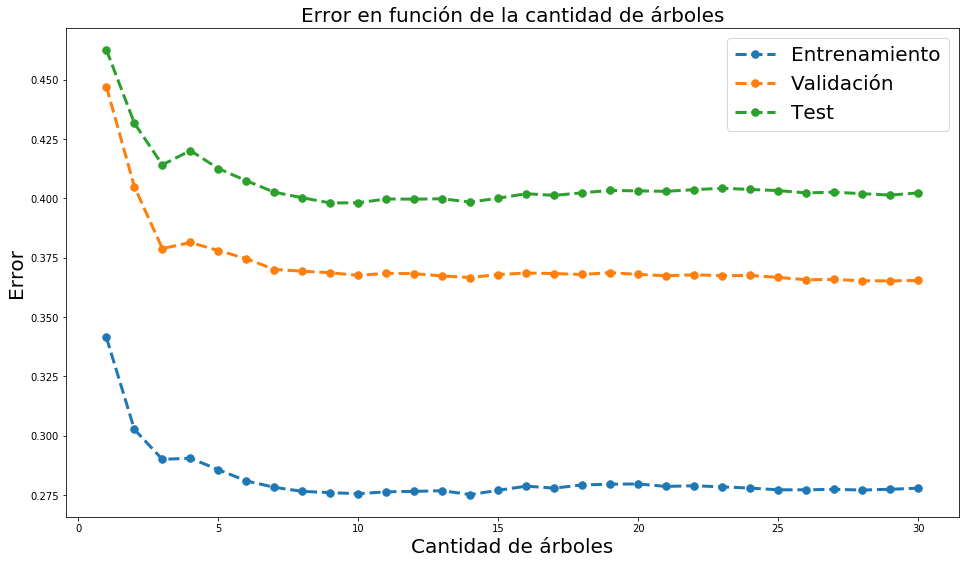

El mejor es 0.40140886183


In [13]:
from sklearn.ensemble import RandomForestRegressor

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','day', 'cday', 'month', 'year']]
Ydf=df.ix[:,'count']

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

eTest = list()
eTrain = list()
eVal = list()

maxArboles = 31

#Se procede a calcularlos errores en funcion de la cantidad de árboles
for i in range(1, maxArboles):
    model = RandomForestRegressor(random_state = 0, n_estimators = i, max_depth=10, n_jobs=-1)
    
    #Se entrena el modelo, notar que se transforma la matriz columna y a un vector fila
    model.fit(X_train, Y_train)
    
    #Se predice el entrenamiento y el test
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    
    #Se guardan los errores
    eTrain.append(eval_bikemodel(Y_train, y_pred_train))
    eVal.append(eval_bikemodel(Y_val, y_pred_val))
    eTest.append(eval_bikemodel(Y_test, y_pred_test))
    
plt.figure(figsize = (16, 9))

grosor = 3
tamañopto = 15

plt.plot( [i for i in range(1, maxArboles)] , eTrain, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)] , eVal, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)], eTest, ".--", linewidth = grosor, markersize = tamañopto)
plt.legend(["Entrenamiento", "Validación" ,  "Test"], prop={'size': 20})
plt.title('Error en función de la cantidad de árboles', fontsize=20)
plt.xlabel("Cantidad de árboles", fontsize=20)
plt.ylabel("Error", fontsize=20)

plt.show()

print("El mejor es",eTest[eVal.index(min(eVal))] )

<p style="font-size: 18px; line-height: 135%;}">
<b>i) </b> Se aprecia en un comienzo que en la medida que se ocupan más máquinas el desempeño del ensamblado mejora, pero, después como a eso de 10 máquinas la ganancia se hace menos notoria.

</p>